# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Install Datasets and Upgrade TensorFlow

To ensure we can download the latest version of the `oxford_flowers102` dataset, let's first install both `tensorflow-datasets` and `tfds-nightly`.
* `tensorflow-datasets` is the stable version that is released on a cadence of every few months
* `tfds-nightly` is released every day and has the latest version of the datasets

We'll also upgrade TensorFlow to ensure we have a version that is compatible with the latest version of the dataset.

In [1]:
%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
%pip --no-cache-dir install --upgrade tensorflow --user
# included to visualize the network architecture
%pip --no-cache-dir install git+https://github.com/paulgavrikov/visualkeras --user

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 4.7MB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 409kB 30.6MB/s eta 0:00:01
     |████████████████████████████████| 133kB 28.2MB/s eta 0:00:01
ERROR: tensorflow-metadata 0.14.0 has requirement protobuf<4,>=3.7, but you'll have protobuf 4.21.6 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


     |███████                         | 126.6MB 35.0MB/s eta 0:00:13

     |███████                         | 128.3MB 35.0MB/s eta 0:00:13

     |███████▏                        | 130.1MB 35.0MB/s eta 0:00:13

     |███████▎                        | 131.8MB 34.8MB/s eta 0:00:13

     |███████▌                        | 135.2MB 34.8MB/s eta 0:00:13

     |███████▋                        | 137.0MB 34.8MB/s eta 0:00:13

     |███████▉                        | 140.6MB 34.8MB/s eta 0:00:13

     |███████▉                        | 142.4MB 34.8MB/s eta 0:00:13

     |████████                        | 144.3MB 34.8MB/s eta 0:00:13

     |████████                        | 146.2MB 34.8MB/s eta 0:00:13

     |████████▍                       | 151.2MB 34.8MB/s eta 0:00:13

     |████████▌                       | 152.8MB 34.8MB/s eta 0:00:13

     |████████▌                       | 154.3MB 34.8MB/s eta 0:00:13

     |████████▊                       | 157.5MB 34.8MB/s eta 0:00:13

     |████████▉                       | 159.2MB 34.8MB/s eta 0:00:13

     |█████████                       | 160.9MB 34.8MB/s eta 0:00:12

     |█████████                       | 162.6MB 34.8MB/s eta 0:00:12

     |█████████                       | 164.3MB 37.2MB/s eta 0:00:12

     |█████████▏                      | 166.0MB 37.2MB/s eta 0:00:12

     |█████████▎                      | 167.8MB 37.2MB/s eta 0:00:12

     |█████████▍                      | 169.7MB 37.2MB/s eta 0:00:11

     |█████████▋                      | 173.2MB 37.2MB/s eta 0:00:11

     |█████████▊                      | 174.9MB 37.2MB/s eta 0:00:11

     |█████████▊                      | 176.6MB 37.2MB/s eta 0:00:11

     |█████████▉                      | 178.4MB 37.2MB/s eta 0:00:11

     |██████████                      | 180.1MB 37.2MB/s eta 0:00:11

     |██████████                      | 181.7MB 37.2MB/s eta 0:00:11

     |██████████▏                     | 183.4MB 37.2MB/s eta 0:00:11

     |██████████▍                     | 186.8MB 37.2MB/s eta 0:00:11

     |██████████▌                     | 190.2MB 37.2MB/s eta 0:00:11

     |██████████▋                     | 192.0MB 37.2MB/s eta 0:00:11

     |██████████▊                     | 193.7MB 37.2MB/s eta 0:00:11

     |██████████▉                     | 195.3MB 37.2MB/s eta 0:00:11

     |███████████                     | 197.1MB 40.5MB/s eta 0:00:10

     |███████████                     | 198.9MB 40.5MB/s eta 0:00:10

     |███████████                     | 200.6MB 40.5MB/s eta 0:00:10

     |███████████▏                    | 202.3MB 40.5MB/s eta 0:00:10

     |███████████▎                    | 204.0MB 40.5MB/s eta 0:00:10

     |███████████▍                    | 205.7MB 40.5MB/s eta 0:00:10

     |███████████▌                    | 207.4MB 40.5MB/s eta 0:00:10

     |███████████▋                    | 209.1MB 40.5MB/s eta 0:00:10

     |███████████▊                    | 210.8MB 40.5MB/s eta 0:00:10

     |███████████▊                    | 212.5MB 40.5MB/s eta 0:00:10

     |████████████                    | 215.9MB 40.5MB/s eta 0:00:09

     |████████████                    | 217.7MB 40.5MB/s eta 0:00:09

     |████████████▏                   | 219.4MB 40.5MB/s eta 0:00:09

     |████████████▎                   | 221.1MB 40.5MB/s eta 0:00:09

     |████████████▎                   | 222.7MB 40.5MB/s eta 0:00:09

     |████████████▍                   | 224.4MB 40.5MB/s eta 0:00:09

     |████████████▌                   | 226.1MB 40.5MB/s eta 0:00:09

     |████████████▋                   | 227.8MB 40.5MB/s eta 0:00:09

     |████████████▊                   | 229.5MB 39.0MB/s eta 0:00:09

     |████████████▉                   | 231.2MB 39.0MB/s eta 0:00:09

     |█████████████                   | 232.9MB 39.0MB/s eta 0:00:09

     |█████████████                   | 234.5MB 39.0MB/s eta 0:00:09

     |█████████████                   | 236.4MB 39.0MB/s eta 0:00:09

     |█████████████▏                  | 238.0MB 39.0MB/s eta 0:00:09

     |█████████████▎                  | 239.7MB 39.0MB/s eta 0:00:09

     |█████████████▍                  | 241.4MB 39.0MB/s eta 0:00:09

     |█████████████▌                  | 243.1MB 39.0MB/s eta 0:00:09

     |█████████████▋                  | 246.4MB 39.0MB/s eta 0:00:09

     |██████████████                  | 251.7MB 39.0MB/s eta 0:00:09

     |██████████████▏                 | 255.1MB 39.0MB/s eta 0:00:09

     |██████████████▏                 | 256.7MB 39.0MB/s eta 0:00:09

     |██████████████▎                 | 258.4MB 39.0MB/s eta 0:00:09

     |██████████████▍                 | 260.1MB 39.0MB/s eta 0:00:09

     |██████████████▌                 | 261.8MB 39.0MB/s eta 0:00:09

     |██████████████▋                 | 263.5MB 9.2MB/s eta 0:00:35

     |██████████████▊                 | 265.2MB 9.2MB/s eta 0:00:35

     |██████████████▉                 | 268.8MB 9.2MB/s eta 0:00:34

     |███████████████                 | 270.5MB 9.2MB/s eta 0:00:34

     |███████████████▏                | 274.1MB 9.2MB/s eta 0:00:34

     |███████████████▎                | 275.9MB 9.2MB/s eta 0:00:33

     |███████████████▌                | 280.3MB 9.2MB/s eta 0:00:33

     |███████████████▊                | 283.7MB 9.2MB/s eta 0:00:33

     |███████████████▉                | 285.5MB 9.2MB/s eta 0:00:32

     |████████████████                | 287.3MB 9.2MB/s eta 0:00:32

     |████████████████                | 289.0MB 9.2MB/s eta 0:00:32

     |████████████████                | 290.8MB 9.2MB/s eta 0:00:32

     |████████████████▏               | 292.2MB 9.2MB/s eta 0:00:32

     |████████████████▎               | 293.8MB 9.2MB/s eta 0:00:32

     |████████████████▍               | 295.5MB 50.4MB/s eta 0:00:06

     |████████████████▋               | 300.3MB 50.4MB/s eta 0:00:06

     |████████████████▉               | 303.6MB 50.4MB/s eta 0:00:06

     |█████████████████               | 305.4MB 50.4MB/s eta 0:00:06

     |█████████████████               | 307.2MB 50.4MB/s eta 0:00:06

     |█████████████████               | 309.1MB 50.4MB/s eta 0:00:06

     |█████████████████▏              | 310.8MB 50.4MB/s eta 0:00:06

     |█████████████████▎              | 312.5MB 50.4MB/s eta 0:00:06

     |█████████████████▍              | 314.2MB 50.4MB/s eta 0:00:06

     |█████████████████▋              | 317.7MB 50.4MB/s eta 0:00:06

     |█████████████████▊              | 319.5MB 50.4MB/s eta 0:00:06

     |████████████████████████████████| 578.0MB 36.6MB/s eta 0:00:01     |██████████████████▌             | 334.0MB 38.6MB/s eta 0:00:07     |██████████████████▋             | 335.8MB 38.6MB/s eta 0:00:07     |███████████████████             | 344.9MB 38.6MB/s eta 0:00:07     |███████████████████▍            | 350.4MB 38.6MB/s eta 0:00:06     |███████████████████▌            | 351.9MB 38.6MB/s eta 0:00:06     |███████████████████▋            | 353.7MB 38.6MB/s eta 0:00:06     |███████████████████▊            | 355.4MB 38.6MB/s eta 0:00:06     |████████████████████▏           | 364.1MB 35.0MB/s eta 0:00:07     |████████████████████▎           | 365.6MB 35.0MB/s eta 0:00:07     |████████████████████▌           | 370.6MB 35.0MB/s eta 0:00:06     |████████████████████▋           | 372.2MB 35.0MB/s eta 0:00:06     |████████████████████▊           | 373.9MB 35.0MB/s eta 0:00:06     |█████████████████████▏          | 382.1MB 35.0MB/s eta 0:00:06     |█████████████████████▉          | 395.3MB 

     |████████████████████████████████| 788kB 62.2MB/s eta 0:00:01
     |████████████████████████████████| 4.9MB 20.6MB/s eta 0:00:01     |█████▊                          | 870kB 20.6MB/s eta 0:00:01
     |████████████████████████████████| 174kB 60.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 59.6MB/s eta 0:00:01
     |████████████████████████████████| 163kB 63.3MB/s eta 0:00:01
     |████████████████████████████████| 153kB 59.6MB/s eta 0:00:01
     |████████████████████████████████| 81kB 49.2MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Found existing installation: protobuf 4.21.6
    Uninstalling protobuf-4.21.6:
      Successfully uninstalled protobuf-4.21.6
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-

  Created wheel for visualkeras: filename=visualkeras-0.0.2-cp37-none-any.whl size=13434 sha256=943b15bb149bc99a16143dce0562afc21867543166c1f85c8d4f1df22a61a9bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-sx_89e1f/wheels/63/ee/ff/e163fd012b516d0922da126313ce2133e97f712726dc4dc722
Successfully built visualkeras
Note: you may need to restart the kernel to use updated packages.


After the above installations have finished **be sure to restart the kernel**. You can do this by going to **Kernel > Restart**.

In [1]:
# Import TensorFlow 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import visualkeras
import tensorflow.keras as K

# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
# TODO: Make all other necessary imports.
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', 
        palette='Spectral', font_scale=0.9)
from typing import Tuple, List

In [3]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
# Info: https://www.tensorflow.org/datasets/catalog/oxford_flowers102
dataset, info = tfds.load(
              name      = 'oxford_flowers102', 
              with_info = True, 
              as_supervised = True)

print('Dataset keys:', dataset.keys())

# TODO: Create a training set, a validation set and a test set.
train_ds, val_ds, test_ds = dataset.values()

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
Dataset keys: dict_keys([Split('train'), Split('test'), Split('validation')])


In [5]:
# Get some info about the dataset
num_classes = info.features['label'].num_classes
print(f'There are {num_classes} in the flowers dataset')

splits_ = ['train', 'validation', 'test']
for s in splits_:
    n_examples = info.splits[s].num_examples
    print(f'\u2022 There are {n_examples} in the {s} set.')

There are 102 in the flowers dataset
• There are 1020 in the train set.
• There are 1020 in the validation set.
• There are 6149 in the test set.


## Explore the Dataset

In [6]:
# TODO: Get the number of examples in each set from the 
# dataset info.
print('Number of examples in each set:')
for s, v in info.splits.items(): 
    print(f'\t\u2022 {s.capitalize()}: {v.num_examples}')
# TODO: Get the number of classes in the dataset from the 
# dataset info.
print('Number of examples in each set:')
num_classes = info.features['label'].num_classes
print(f'\t\u2022 {num_classes} classes')

Number of examples in each set:
	• Train: 1020
	• Test: 6149
	• Validation: 1020
Number of examples in each set:
	• 102 classes


In [7]:
# TODO: Print the shape and corresponding label of 3 images 
# in the training set.
for i, (image, label) in enumerate(train_ds.take(3), 1):
    print(f'The image #{i} in the training set has:')
    print(f'\t\u2022 Shape {image.shape}')
    print(f'\t\u2022 Label {label}')

The image #1 in the training set has:
	• Shape (500, 667, 3)
	• Label 72
The image #2 in the training set has:
	• Shape (500, 666, 3)
	• Label 84
The image #3 in the training set has:
	• Shape (670, 500, 3)
	• Label 70


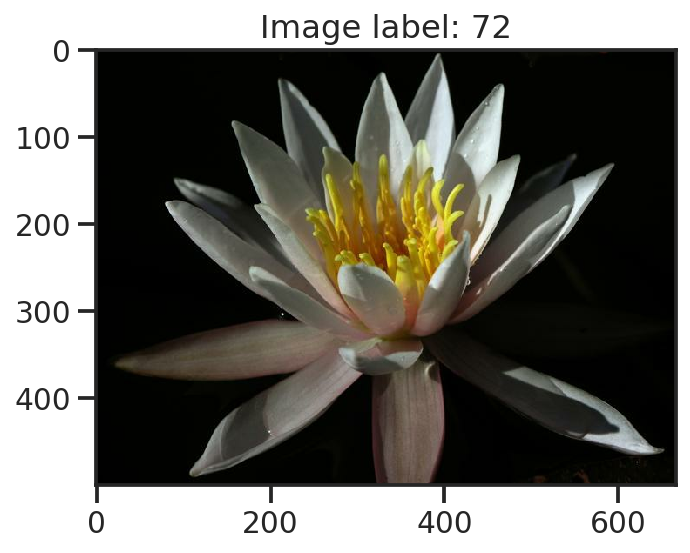

In [8]:
# TODO: Plot 1 image from the training set. 

# Set the title of the plot to the corresponding image label. 
for (image, label) in train_ds.take(1):
    plt.imshow(image)
    plt.title(f'Image label: {label}')

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
# Convert keys to integers
class_names = {int(key): value for key, value in class_names.items()}

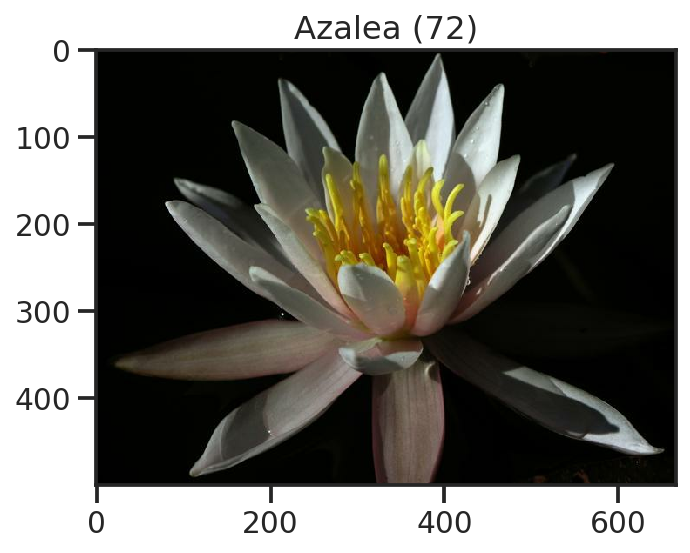

In [10]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for (image, label) in train_ds.take(1):
    plt.imshow(image)
    class_name = class_names[label.numpy()]
    plt.title(f'{class_name.capitalize()} ({label})')

## Create Pipeline

In [11]:
# TODO: Createa pipeline for each set.
BATCH_SIZE = 32
IMAGE_SIZE = 224 
N_CHANNELS = 3 


# Create a function for data normalization
def normalize_image(image: np.array, 
              label: int, 
              image_size: int = IMAGE_SIZE) -> Tuple:
    '''A simple function to resize 
       and normalize a given image'''
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label

# Split dimensions
num_train_examples = info.splits['train'].num_examples
num_val_examples   = info.splits['validation'].num_examples
num_test_examples  = info.splits['test'].num_examples

# Perform the transformation for each set

train_batches = train_ds\
                    .shuffle(buffer_size = num_train_examples//4)\
                    .map(map_func = normalize_image)\
                    .batch(batch_size = BATCH_SIZE)\
                    .prefetch(buffer_size = 1)

val_batches = val_ds\
                .map(map_func = normalize_image)\
                .batch(BATCH_SIZE).prefetch(1)

test_batches = test_ds\
                .map(map_func = normalize_image)\
                .batch(BATCH_SIZE).prefetch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

### Load the MobileNet

In [12]:
# TODO: Build and train your network.

# 1) Load the MobileNet
MN_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(MN_URL, input_shape=(IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS))
# 2) Freeze the weights and biases of the pre-trained network
feature_extractor.trainable = False

### Build the Model

In [13]:
# Model architecture
model = K.Sequential( layers =[
    # Mobilnet pretrained layers
    feature_extractor, 
    # Output layer for our multiclass classification (softmax)
    K.layers.Dense(num_classes, activation = 'softmax')
], name = 'MyNet')

# Model summary
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "MyNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


### Compile the model

In [19]:
# Number of epochs
EPOCHS = 30

# Callbacks - Early stopping
METRIC_MONITOR = 'val_loss'
MODE     = 'min'
PATIENCE = 4

early_stop = K.callbacks.EarlyStopping(
      monitor  = METRIC_MONITOR,
      mode     = MODE,
      patience = PATIENCE,
      restore_best_weights = True,
      verbose = 2)

# Optimizer
learning_rate = 0.005
optimizer = K.optimizers.Nadam(
      learning_rate = learning_rate, 
      beta_1        = 0.9, 
      beta_2        = 0.999, 
      epsilon       = 1e-07,
      name          = 'Nadam')

# Compile the model
# Use `sparse_categorical_crossentropy` for multiclass task
model.compile(optimizer = optimizer,
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

### Train the model

In [21]:
history = model.fit(train_batches,
                    epochs          = EPOCHS,
                    validation_data = val_batches,
                    callbacks       = [early_stop],
                    verbose = 1
                   )
import pickle
# Save the history object to a file
with open('./trainHistory.pkl', 'wb') as file:
    pickle.dump(history, file)

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.6237 - accuracy: 0.8441WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f77e51c4440> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 150s 5s/step - loss: 0.6237 - accuracy: 0.8441 - val_loss: 1.1267 - val_accuracy: 0.7078
Epoch 2/30
32/32 [==============================] - 146s 5s/step - loss: 0.0877 - accuracy: 0.9922 - val_loss: 0.9260 - val_accuracy: 0.7593
Epoch 3/30
32/32 [==============================] - 148s 5s/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.7749
Epoch 4/30
32/32 [===========================

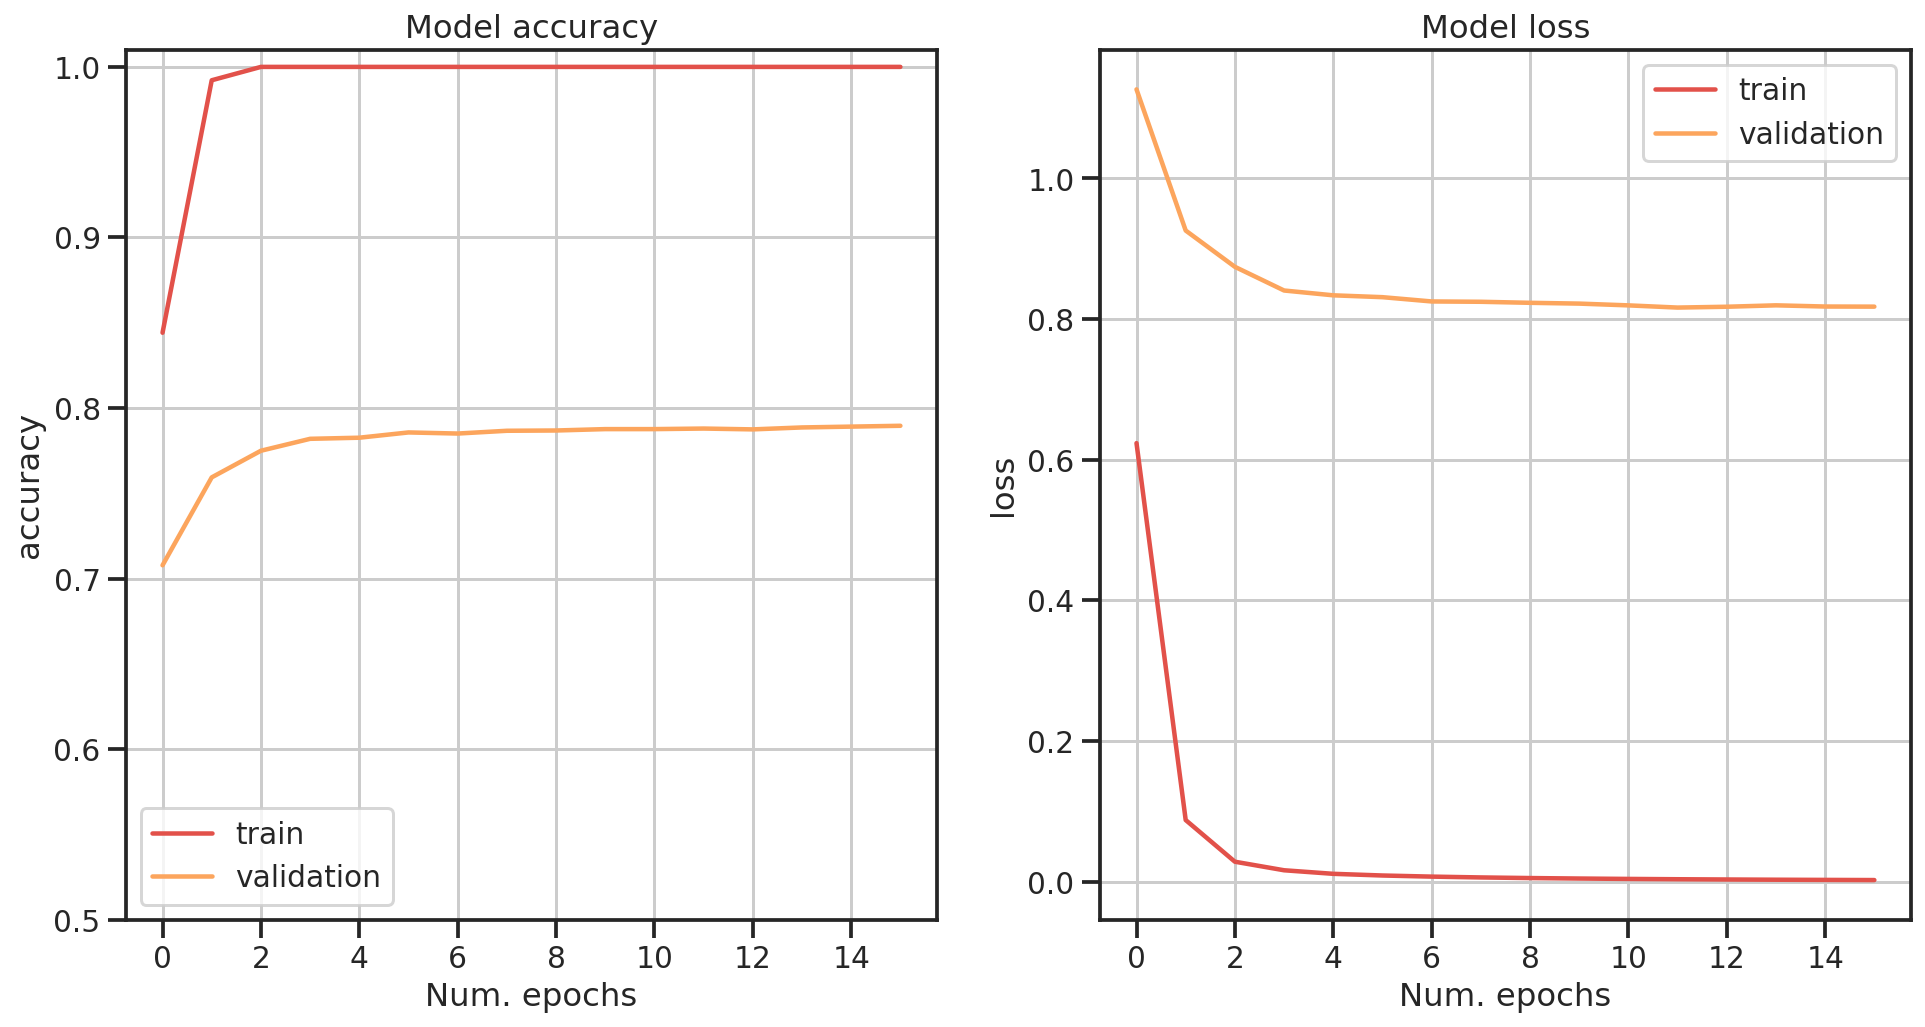

In [52]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
fig, ax = plt.subplots(1, 2, figsize = (16, 8))


# Plot Accuracy
metric = 'accuracy'
ax[0].plot(history.history[f'{metric}'])
ax[0].plot(history.history[f'val_{metric}'])
ax[0].set_ylim((0.5, 1.01))
ax[0].set(title = f'Model {metric}', 
          xlabel = 'Num. epochs', ylabel = metric)
ax[0].legend(['train', 'validation'])
ax[0].grid()


metric = 'loss'
ax[1].plot(history.history[f'{metric}'])
ax[1].plot(history.history[f'val_{metric}'])
ax[1].set(title = f'Model {metric}', 
          xlabel = 'Num. epochs', ylabel = metric)
ax[1].legend(['train', 'validation'])
ax[1].grid()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [57]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
score_test = model.evaluate(test_batches)

for i, j in zip(history.history.keys(), score_test):
    print(f'{i.upper()}: {j:.3f}')

32/32 [==============================] - 21s 660ms/step - loss: 0.6849 - accuracy: 0.8284
LOSS: 0.685
ACCURACY: 0.828


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [58]:
# TODO: Save your trained model as a Keras model.
model_filepath = './model_best_epoch.h5'
model.save(model_filepath)

## Load the Keras Model

Load the Keras model you saved above.

In [13]:
# TODO: Load the Keras model
model_filepath = './model_best_epoch.h5'
loaded_model   = tf.keras.models.load_model(model_filepath,
                            custom_objects={'KerasLayer': hub.KerasLayer},
                                           compile = False)

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [14]:
# TODO: Create the process_image function
IMAGE_SIZE = 224

def process_image(image: np.array, 
                  image_size: int = IMAGE_SIZE) -> np.array:
    '''A simple function to process a given image
       before feed the model with it'''
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    image = image.numpy()
    return image


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

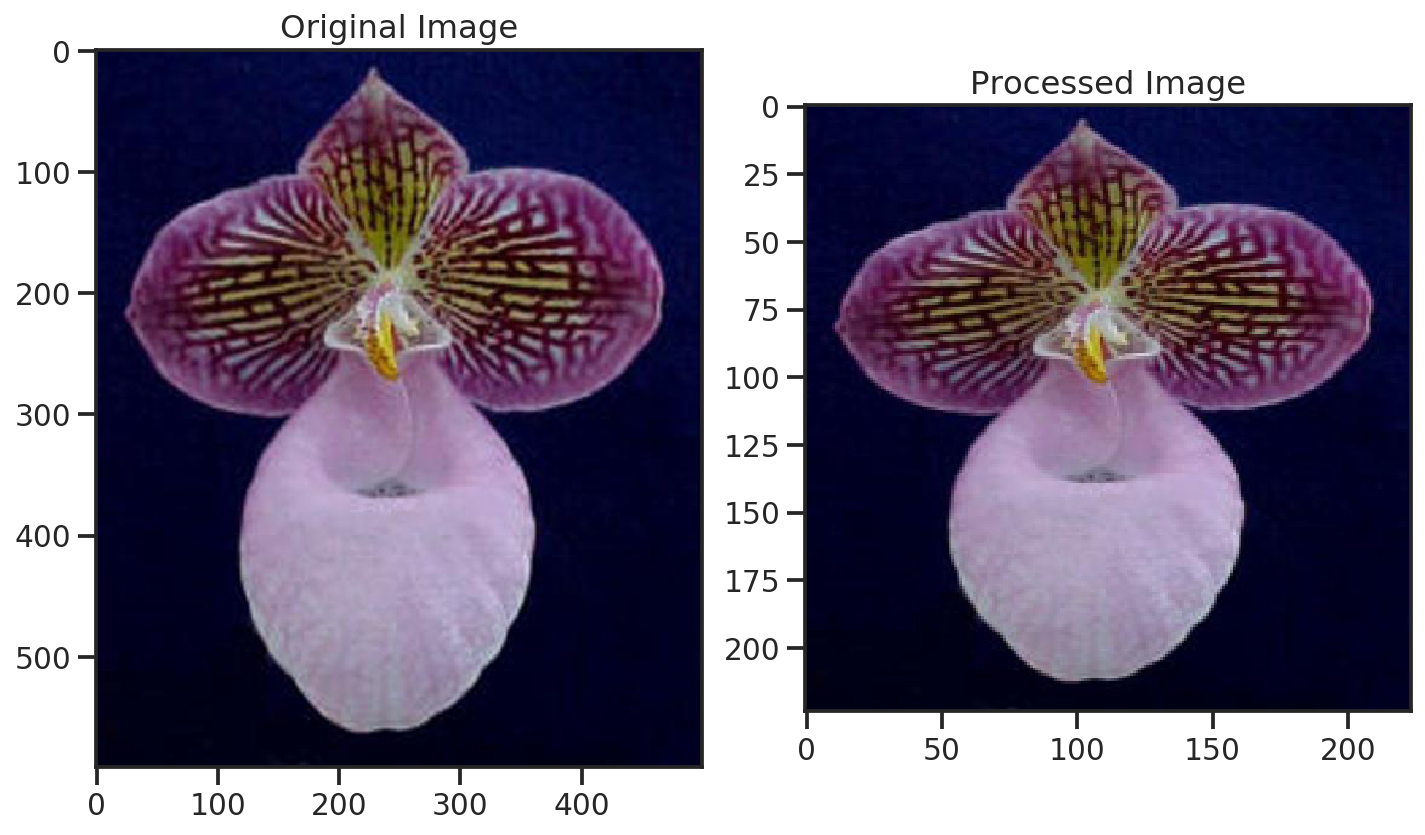

In [15]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
img = Image.open(image_path)
test_image = np.asarray(img)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [31]:
# TODO: Create the predict function
def predict(image_path: str, 
            model: tf.keras.models, 
            top_k: int = 5) -> Tuple:
    img = Image.open(image_path)
    img = np.asarray(img)
    img = process_image(img)
    img = np.expand_dims(img, axis = 0)
    preds   = model.predict(img)[0]
    top_values_idx = np.argpartition(preds, -top_k)[-top_k:]
    top_values_idx = top_values_idx[np.argsort(preds[top_values_idx])][::-1]
    probs   = preds[top_values_idx]
    # add one so the first class will be 1 instead of 0
    classes = top_values_idx + 1
    return probs, classes

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 50ms/step


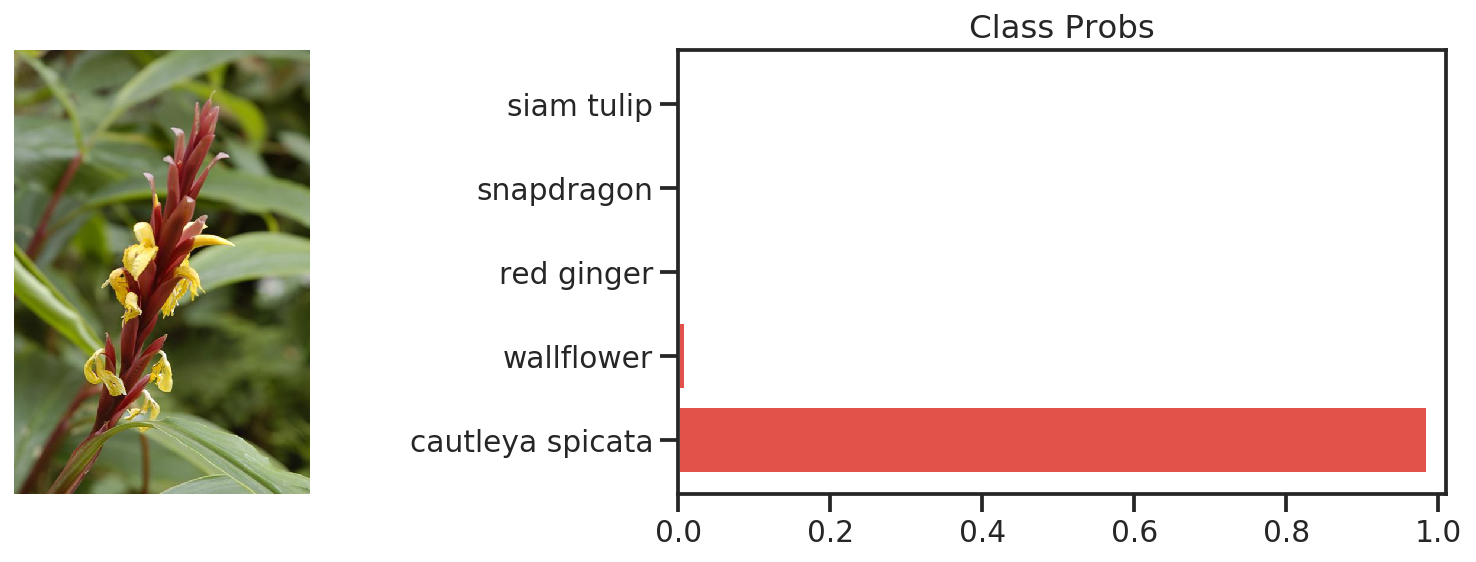

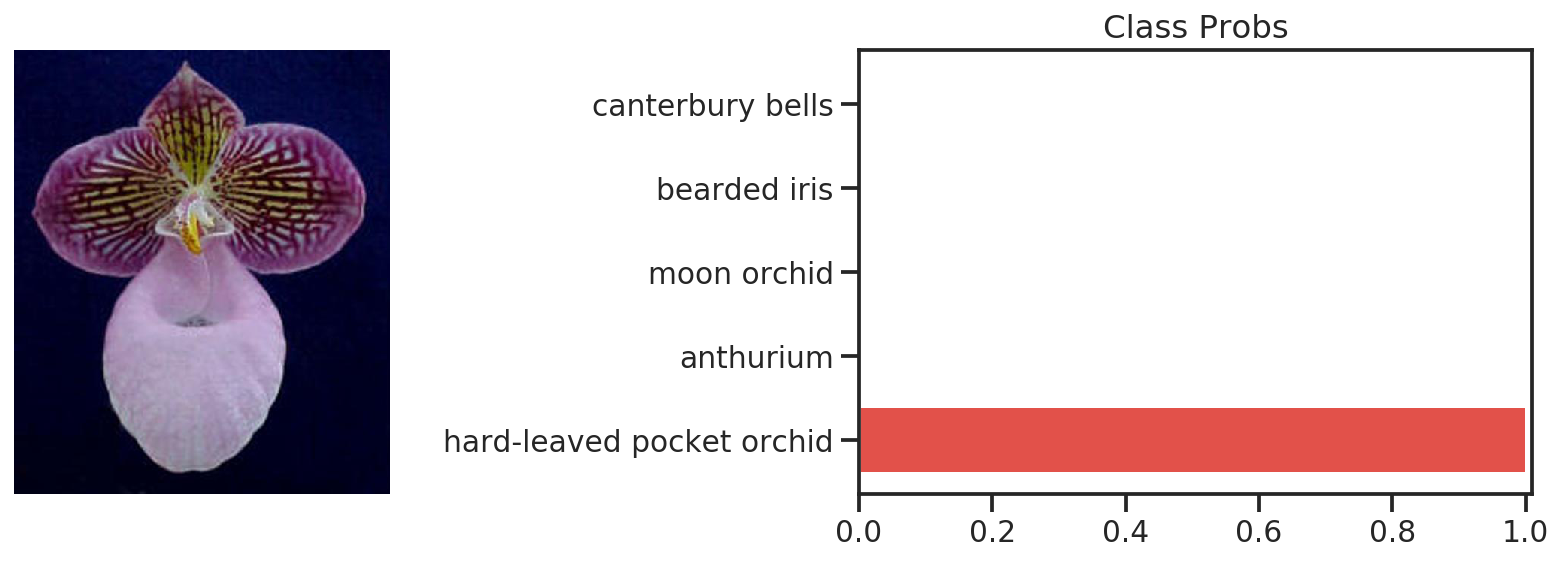

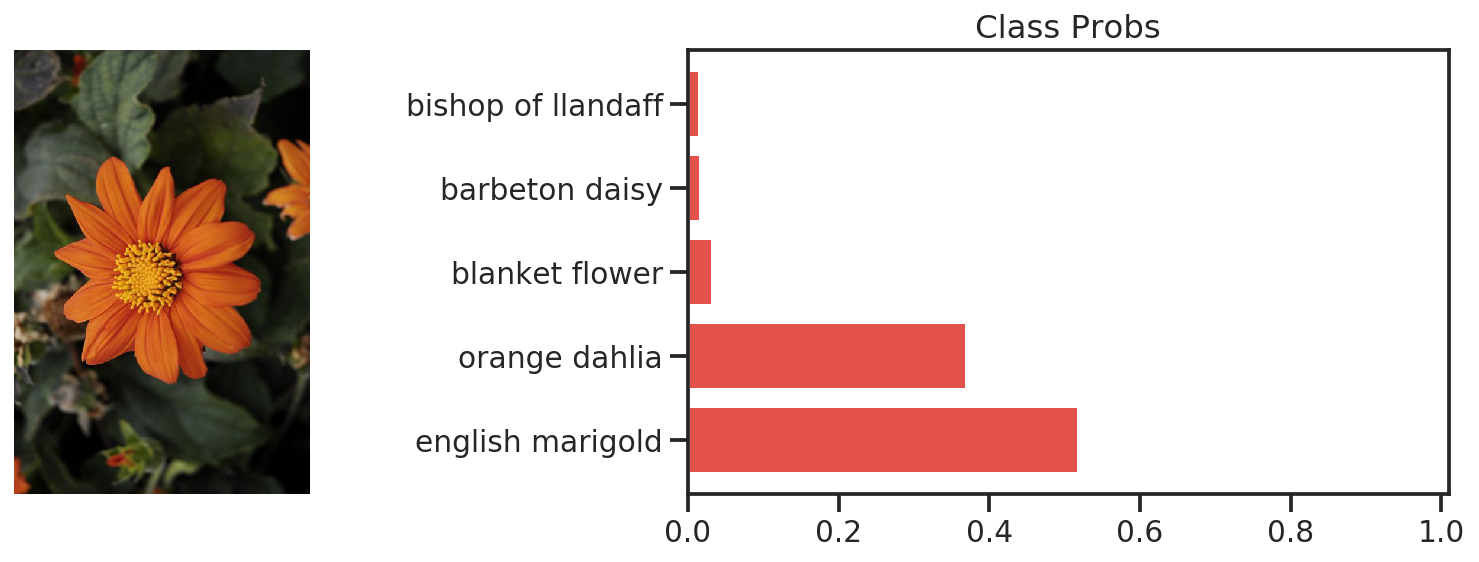

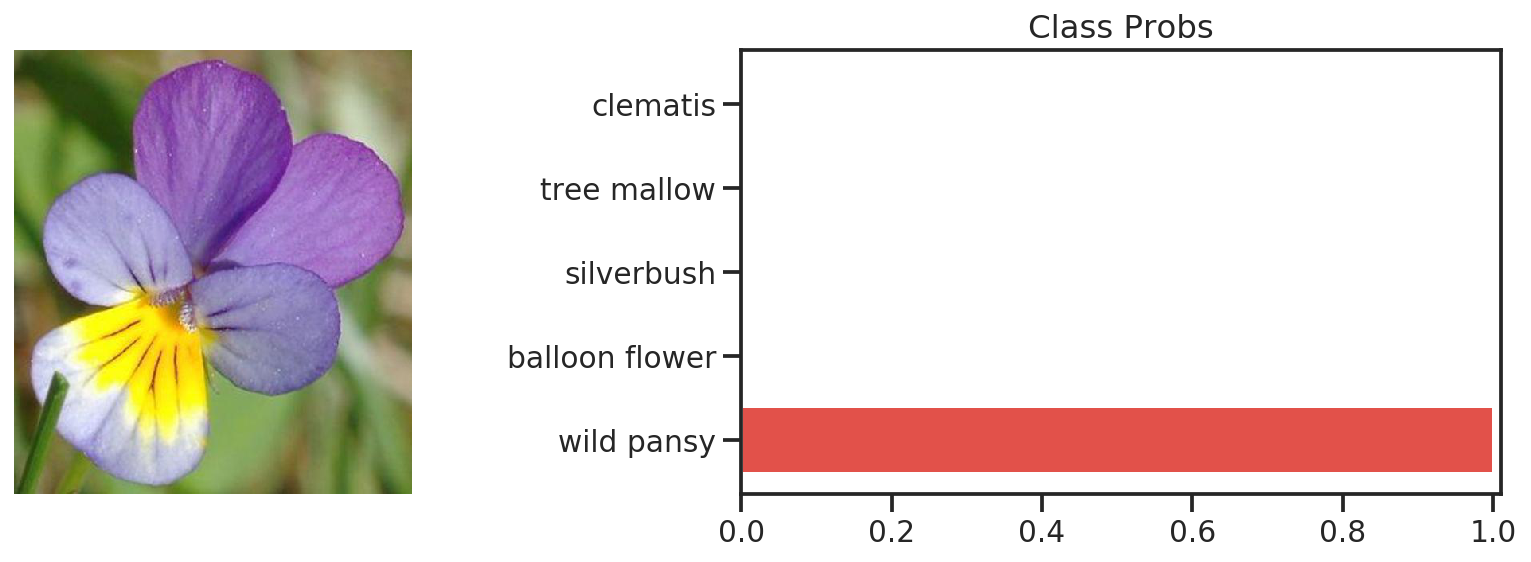

In [32]:
# TODO: Plot the input image along with the top 5 classes
file_names = ['cautleya_spicata.jpg',
              'hard-leaved_pocket_orchid.jpg',
              'orange_dahlia.jpg',
              'wild_pansy.jpg']

TOP_K = 5
for file in file_names:
    image_path = f'./test_images/{file}'
    image = np.asarray(Image.open(image_path)).squeeze()
    # Make the prediction
    probs, classes = predict(image_path, loaded_model, top_k = TOP_K)
    # Plot the image
    fig, ax = plt.subplots(figsize=(12,4), ncols=2)
    ax[0].imshow(image)
    ax[0].axis('off')
    # Plot the probabilities
    ax[1].set_yticks(np.arange(TOP_K))
    ax[1].barh(np.arange(TOP_K), probs)
    ax[1].set_yticklabels([class_names.get(key) for key in classes])
    ax[1].set(title = 'Class Probs', xlim = (0, 1.01))
    plt.tight_layout()
